<a href="https://colab.research.google.com/github/maykends/-Data_science_studies/blob/main/Machine_Learning_e_Data_Science_com_Python_de_A_%C3%A0_Z_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning e Data Science com Python(Classificacão)

# Importação das bibliotecas básicas

In [1]:
# biblioteca para gerar gráficos dinâmicos na versão mais recente usando o --upgrade
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [3]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 

- ***Pandas*** é uma biblioteca que fornece estruturas de dados eficientes para manipulação e análise de dados, especialmente tabelas e séries temporais. Com Pandas, é possível ler, escrever e filtrar dados em diversos formatos, além de realizar operações estatísticas e de agregação.

- ***Numpy*** é uma biblioteca que fornece suporte para arrays e matrizes multidimensionais, bem como funções para operações numéricas com esses objetos. Ela é amplamente utilizada para cálculos científicos e computacionais em Python.

- ***Seaborn*** é uma biblioteca de visualização de dados baseada no Matplotlib, que fornece uma interface de alto nível para criação de gráficos estatísticos atraentes e informativos. Ela é especialmente útil para visualização de distribuições, relacionamentos e tendências em conjuntos de dados complexos.

- ***Matplotlib.pyplot*** é uma sub-biblioteca do Matplotlib que fornece funções para criação de gráficos e visualizações de dados. Ela é a biblioteca padrão para plotagem de dados em Python e oferece uma grande variedade de opções para personalização e formatação de gráficos.

- ***Plotly.express*** é uma biblioteca de visualização de dados interativa, que permite criar gráficos interativos em Python com poucas linhas de código. Ela oferece suporte a diversos tipos de gráficos, incluindo scatter plots, barras, mapas e mais, além de permitir a adição de interatividade como zoom e tooltips.

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

Conjunto de dados de Risco de Crédito. Este conjunto de dados contém colunas que simulam dados de bureau de crédito.

### Exploração dos dados

In [7]:
base_credit = pd.read_csv('/content/credit_data.csv') # Realizando a leitura

In [8]:
base_credit # Visualização da base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


A ideia principal deste conjunto de dados é prever se o cliente vai pagar ou não pagar o empréstimo. Para realizar essa tarefa, é importante analisar o atributo "default", que indica se houve ou não inadimplência. Neste caso, a coluna "default" possui valores binários, onde "0" indica que o cliente pagou e "1" indica que o cliente não pagou o empréstimo.

As variáveis "clientid", "income", "age", "loan" são consideradas como atributos preditóres. Já a variável "default" indica o atributo Meta ou Classe da base de dados.

*Entendendo um pouco o contexto de cada variável*

- "clientid" é como se fosse o nome de um cliente como forma de indetificação
- "income" é a renda do cliente, no geral as bases de dados internacinais são consideradas a renda do cliente anual
- "age" indica a indade do cliente 
- "loan" indica a dívida que a pessoa possui 
- "default" indica 0 pagou e 1 não pagou o empréstimo

*Quais são os tipos de variáveis?*

- "clientid" é considerado uma variável "Nominal"
- "income" é considerado uma variável "Numérica" do tipo "Contínua"
- "age" é considerado uma variável "Numérica" do tipo "Contínua"
- "loan" é considerado uma variável "Numérica" do tipo "Contínua"
- "default" é considerado uma variável "Numérica" do tipo "Discreta"

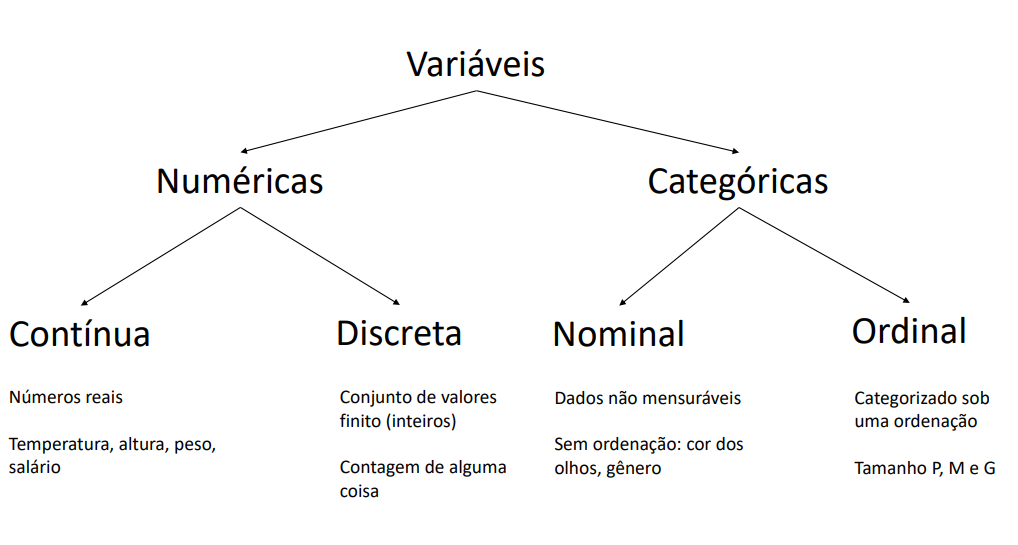

In [10]:
base_credit.head(10) # visualiza os 10 primeiros registros

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [13]:
base_credit.tail() # visualiza os 5 últimos registros

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


O método describe() do Pandas Python retorna um conjunto de estatísticas descritivas para cada coluna de um DataFrame. As estatísticas incluem:

- count: indica o número de valores não nulos (ou seja, a quantidade de observações/amostras) presentes na coluna.
- mean: indica a média aritmética dos valores na coluna.
- std: indica o desvio padrão dos valores na coluna, que mede a dispersão em torno da média.
- min: indica o menor valor presente na coluna.
- 25%: indica o primeiro quartil dos valores na coluna, ou seja, o valor abaixo do qual se encontra 25% dos dados.
- 50%: indica a mediana dos valores na coluna, ou seja, o valor que separa a metade inferior dos dados da metade superior.
- 75%: indica o terceiro quartil dos valores na coluna, ou seja, o valor abaixo do qual se encontra 75% dos dados.
- max: indica o maior valor presente na coluna.

In [15]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [17]:
# Realizando um filtro para saber a pessoa que mais ganha anualmente 
base_credit[base_credit['income'] == 69995.685578] 
#repare que o valor não aparece pelo fato que foi arredondado no describe. Assim, não retorna o valor exato

,clientid,income,age,loan,default


In [19]:
# Realizando mais um filtro para saber a pessoa que mais ganha anualmente >=
base_credit[base_credit['income'] >= 69995.685578] 

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [23]:
# Realizando filtro para saber a dívida mínima de uma pessoa 
base_credit[base_credit['loan'] <= 1.377630] 
# repare que é o cliente 865 da base de dados

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Visualização dos dados

### Tratamento de valores inconsistentes